In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

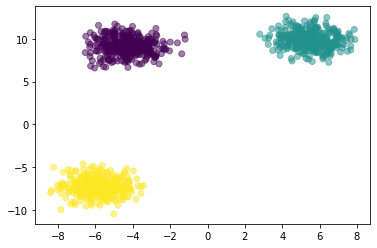

In [6]:
# Create dataset with 3 random cluster centers and 1000 datapoints
X, y = make_blobs(n_samples = 1000, centers = 3, n_features=2, shuffle=True, random_state=31)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)

In [40]:
def kmeans(X, k = 3, epochs = 100):
    """
    Performs kmeans clustering
    """
    # randomly pick k observations as centroids
    old_centroids_indices = np.random.choice(X.shape[0], k, replace=False)
    old_centroids = X[old_centroids_indices]
    
    epoch = 0
    while epoch < epochs:
        new_assignments = np.argmin(cdist(X, old_centroids), axis = 1) # assign labels by old_centroids.
        # compute new_centroids by taking means
        new_centroids = np.zeros((k, X.shape[1])) 
        for i in range(k):
            new_centroids[i] = np.mean(X[new_assignments == i], axis=0)
        # if old_centroids and new_centroids are very close
        if np.sum(np.linalg.norm(old_centroids-new_centroids, axis=1)) < 1e-5:
            break
        else:
            old_centroids = new_centroids
        epoch += 1

    return new_assignments, new_centroids

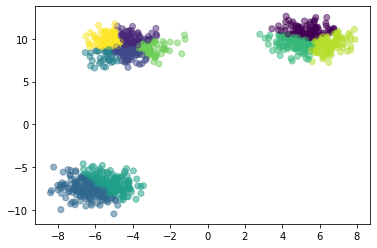

In [42]:
np.random.seed(5)
assignments, centroids = kmeans(X, k=10, epochs=10)
plt.scatter(X[:, 0], X[:, 1], c=assignments, alpha=0.5)

In [17]:
def WCSS(X, kmax):
    WCSS_list = []
    for k in range(1, kmax+1):
        assignments, centroids=kmeans(X, k)
        WCSS = 0
        for i, x in enumerate(X):
            centroid = centroids[assignments[i]]
            WCSS += np.sum((x - centroid)**2)
        WCSS_list.append(WCSS)
    return WCSS_list

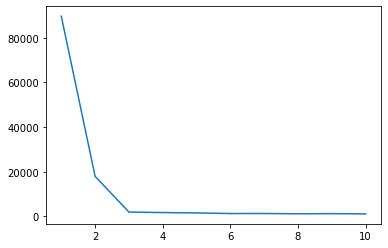

In [41]:
kmax=10
WCSS_list = WCSS(X, kmax)
#print(WCSS_list)
plt.plot(range(1, kmax+1), WCSS_list)